In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

shape:  (1024, 1024)


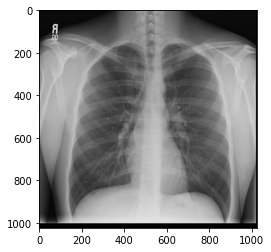

In [2]:
path = '30/training_data/00006724_000.png'
image = cv2.imread(path,0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print("shape: ",image.shape)

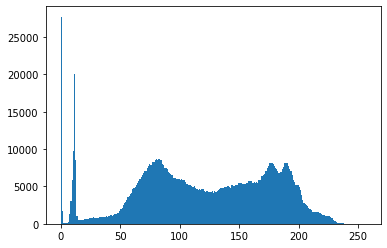

In [7]:
plt.hist(image.ravel(),256,[0,256])
plt.show()

In [8]:
# global thresholding
ret1,th1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)

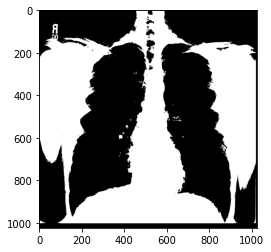

In [9]:
plt.imshow(th1,'gray')

119.0


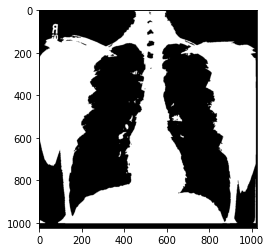

In [10]:
blur = cv2.GaussianBlur(image,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret3)
plt.imshow(th3,'gray')

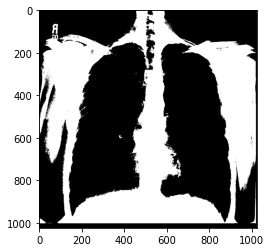

In [11]:
import skimage.filters as filters
text_threshold = filters.threshold_local(image,block_size=801, offset=-20) 
scikit_thresh = image > text_threshold
plt.imshow(scikit_thresh,'gray');

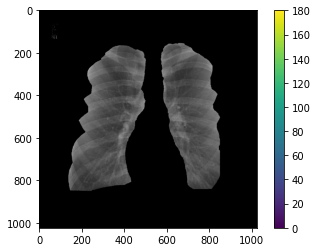

(<matplotlib.image.AxesImage at 0x7fd3d96f3f90>,
 None)

In [12]:
image = cv2.imread(path)
mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,800,800)
cv2.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img=image
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

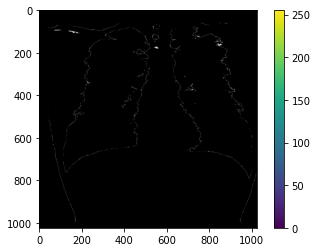

(<matplotlib.image.AxesImage at 0x7fd3d95de190>,
 None)

In [13]:
path = '30/training_data/00006724_001.png'
image = cv2.imread(path,0)
blur = cv2.GaussianBlur(image,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
image = cv2.cvtColor(th3, cv2.COLOR_GRAY2RGB)
image = cv2.GaussianBlur(image,(5,5),0)
image = cv2.bitwise_not(image)
mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (40,60,980,940)
cv2.grabCut(image,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img=image
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

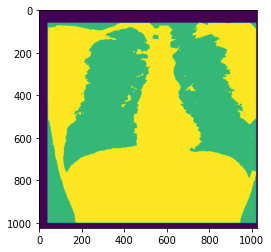

In [14]:
plt.imshow(mask)

{-1: 11156, 1: 653576, 2: 22512, 3: 18254, 4: 148652, 5: 163282, 6: 22162, 7: 8982}


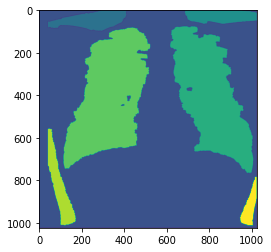

In [100]:
path = '30/training_data/00006724_000.png'
#image = cv2.imread(path)
image = cv2.cvtColor(neg, cv2.COLOR_GRAY2BGR)
blur = cv2.GaussianBlur(image,(7,7),0)
blur = cv2.GaussianBlur(image,(3,3),0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#plt.imshow(thresh,'gray')
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 10)
#plt.imshow(opening,'gray')
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=2)
#plt.imshow(sure_bg,'gray')
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.03*dist_transform.max(),255,0)
#plt.imshow(sure_fg,'gray')
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
#plt.imshow(unknown,'gray')
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
#plt.imshow(markers,'gray')
markers = cv2.watershed(image,markers)
image[markers == -1] = [255,0,0]
plt.imshow(markers)
unique, counts = np.unique(markers, return_counts=True)
print(dict(zip(unique, counts)))

In [101]:
#np.unique(markers)
unique, counts = np.unique(markers, return_counts=True)
labels = dict(zip(unique, counts))

In [102]:
sorted_labels = sorted(labels.items(), key = 
             lambda kv:(kv[1], kv[0]))

In [103]:
sorted_labels

[(7, 8982),
 (-1, 11156),
 (3, 18254),
 (6, 22162),
 (2, 22512),
 (4, 148652),
 (5, 163282),
 (1, 653576)]

In [104]:
def ground_truth(image, sorted_labels):
    lung1 = sorted_labels[-2][0]
    lung2 = sorted_labels[-3][0]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j]==lung1 or image[i][j]==lung2:
                image[i][j]=1
            else:
                image[i][j]=0
    return image

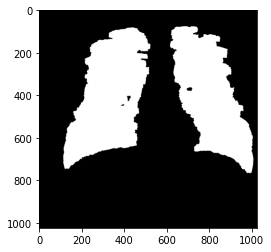

In [105]:
ground_truth = ground_truth(markers.copy(), sorted_labels)
plt.imshow(ground_truth,'gray')

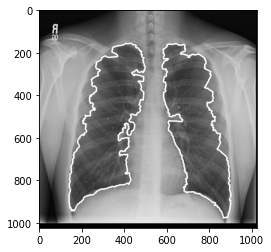

In [21]:
ground_truth = ground_truth.astype(np.uint8)
contours = cv2.findContours(ground_truth, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
#image = ground_truth.copy()
image = cv2.imread(path,0)
cv2.drawContours(image, contours[0], -1, (255,0,0), thickness = 5)
plt.imshow(image,'gray')

In [22]:
contour = np.array(contours[0])
lung1 = []
for i in range((contour[0]).shape[0]):
    lung1.append(contour[0][i][0])

/home/chella/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [23]:
np.array(lung1).T

array([[636, 635, 634, ..., 639, 638, 637],
       [158, 159, 159, ..., 158, 158, 158]], dtype=int32)

In [24]:
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [25]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5, 5))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

/home/chella/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  This is separate from the ipykernel package so we can avoid doing imports until


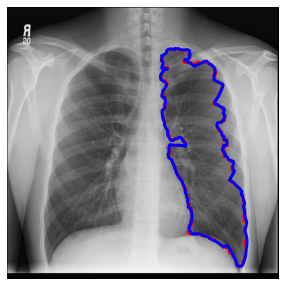

In [34]:
image = cv2.imread(path,0)
points=np.array(lung1)
snake = seg.active_contour(image, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

[[629.67562312 158.4249388 ]
 [629.68530239 158.42381076]
 [629.6905688  158.42249137]
 ...
 [629.62596747 158.42880632]
 [629.64567825 158.4272091 ]
 [629.66232487 158.42599479]]
[[629 158]
 [629 158]
 [629 158]
 ...
 [629 158]
 [629 158]
 [629 158]]


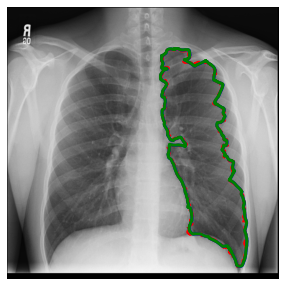

In [27]:
print(snake)
snake = snake.astype(int)
print(snake)
ax.plot(snake[:, 0], snake[:, 1], '-g', lw=3);
fig

In [35]:
img = np.zeros(image.shape)
cv2.fillPoly(img, pts =[snake], color=(255,255,255))
plt.imshow(img)

error: OpenCV(4.4.0) ../modules/imgproc/src/drawing.cpp:2395: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'fillPoly'


In [29]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

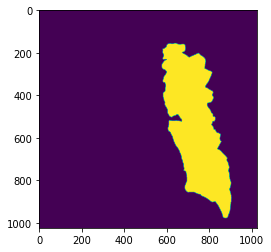

In [30]:
plt.imshow(img)

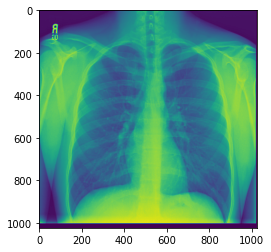

In [31]:
plt.imshow(image)

In [32]:
image

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  4, 11, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

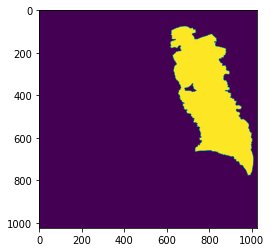

In [553]:
for i in range(markers.shape[0]):
    for j in range(markers.shape[1]):
        if markers[i][j]==5:
            markers[i][j]=255
        else:
            markers[i][j]=0
plt.imshow(markers)         

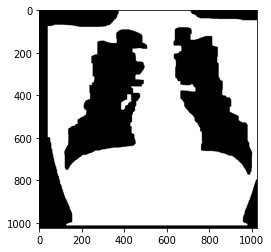

In [431]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

from maxflow.fastmin import aexpansion_grid

image_path = '30/training_data/00006724_001.png'
# Loading image
#I = imageio.imread(image_path)
I = cv2.imread(image_path)
I = I[:,:,1]/I.max()

# Generates 16 gray levels for nearsest prototype labeling
L = 2
levs = np.arange(0.5/L, 1, 1/L)

# Calculate data cost as the absolute difference between the label prototype and the pixel value
D = np.abs(I.reshape(I.shape+(1,)) - levs.reshape((1,1,-1)))

# Calculate neighbourhood cost as absolute difference between prototypes 
alpha = 1
V = alpha * np.abs( levs.reshape((-1,1)) - levs.reshape((1,-1)))

# Graph_Cut alpha expansion method
labels = aexpansion_grid(D,V)


# plotting
fg = plt.figure("Regularised labeling")
labels = labels.astype(np.uint8)
OldMin = 0
OldMax = max(np.unique(labels))
NewMin = 0
NewMax = 255
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        OldValue = labels[i][j]

        OldRange = (OldMax - OldMin)  
        NewRange = (NewMax - NewMin)  
        labels[i][j] = int((((OldValue - OldMin) * NewRange) / OldRange) + NewMin)



labels = cv2.cvtColor(labels, cv2.COLOR_GRAY2RGB)
labels = labels.astype(np.uint8)
plt.imshow(cv2.cvtColor(labels, cv2.COLOR_RGB2BGR))

In [432]:
marks = cv2.cvtColor(labels, cv2.COLOR_RGB2GRAY)

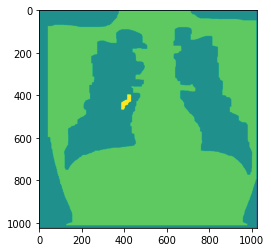

In [433]:
ret, markers = cv2.connectedComponents(marks)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
#markers[unknown==255] = 0
#plt.imshow(markers,'gray')
markers = cv2.watershed(image,markers)
#image[markers == -1] = [255,0,0]
plt.imshow(markers)

In [423]:
np.unique(markers)

array([-1,  1,  2,  3,  4,  5], dtype=int32)

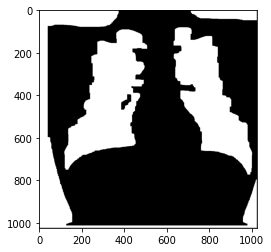

In [434]:
img = np.zeros(markers.shape)
for i in range(markers.shape[0]):
    for j in range(markers.shape[1]):
        if markers[i][j]==1:
            img[i][j]=255
        else:
            img[i][j]=0
plt.imshow(img,'gray')

In [426]:
from skimage import measure
all_labels = measure.label(marks)
blobs_labels = measure.label(marks, background=0)

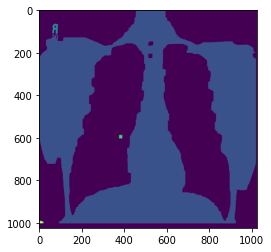

In [428]:
plt.imshow(blobs_labels)

In [430]:
np.unique(all_labels)

array([0, 1, 2, 3, 4])

In [29]:
import nibabel as nib
import numpy as np
from scipy.interpolate import interp1d
from skimage import io


def nyul_apply_standard_scale(input_image,
                              standard_hist,
                              input_mask=None,
                              interp_type='linear'):
    """
    Based on J.Reinhold code:
    https://github.com/jcreinhold/intensity-normalization
    Use Nyul and Udupa method ([1,2]) to normalize the intensities
    of a MRI image passed as input.
    Args:
        input_image (np.ndarray): input image to normalize
        standard_hist (str): path to output or use standard histogram landmarks
        input_mask (nii): optional brain mask
    Returns:
        normalized (np.ndarray): normalized input image
    References:
        [1] N. Laszlo G and J. K. Udupa, “On Standardizing the MR Image
            Intensity Scale,” Magn. Reson. Med., vol. 42, pp. 1072–1081,
            1999.
        [2] M. Shah, Y. Xiao, N. Subbanna, S. Francis, D. L. Arnold,
            D. L. Collins, and T. Arbel, “Evaluating intensity
            normalization on MRIs of human brain with multiple sclerosis,”
            Med. Image Anal., vol. 15, no. 2, pp. 267–282, 2011.
    """

    # load learned standard scale and the percentiles
    standard_scale, percs = np.load(standard_hist)

    # apply transformation to image
    return do_hist_normalization(input_image,
                                 percs,
                                 standard_scale,
                                 input_mask,
                                 interp_type=interp_type)


def get_landmarks(img, percs):
    """
    get the landmarks for the Nyul and Udupa norm method for a specific image
    Based on J.Reinhold code:
    https://github.com/jcreinhold/intensity-normalization
    Args:
        img (nibabel.nifti1.Nifti1Image): image on which to find landmarks
        percs (np.ndarray): corresponding landmark percentiles to extract
    Returns:
        landmarks (np.ndarray): intensity values corresponding to percs in img
    """
    landmarks = np.percentile(img, percs)
    return landmarks


def nyul_train_standard_scale(img_fns,
                              mask_fns=None,
                              i_min=1,
                              i_max=99,
                              i_s_min=1,
                              i_s_max=100,
                              l_percentile=10,
                              u_percentile=90,
                              step=10):
    """
    determine the standard scale for the set of images
    Based on J.Reinhold code:
    https://github.com/jcreinhold/intensity-normalization
    Args:
        img_fns (list): set of NifTI MR image paths which are to be normalized
        mask_fns (list): set of corresponding masks (if not provided, estimated)
        i_min (float): minimum percentile to consider in the images
        i_max (float): maximum percentile to consider in the images
        i_s_min (float): minimum percentile on the standard scale
        i_s_max (float): maximum percentile on the standard scale
        l_percentile (int): middle percentile lower bound (e.g., for deciles 10)
        u_percentile (int): middle percentile upper bound (e.g., for deciles 90)
        step (int): step for middle percentiles (e.g., for deciles 10)
    Returns:
        standard_scale (np.ndarray): average landmark intensity for images
        percs (np.ndarray): array of all percentiles used
    """

    # compute masks is those are not entered as a parameters
    mask_fns = [None] * len(img_fns) if mask_fns is None else mask_fns

    percs = np.concatenate(([i_min],
                            np.arange(l_percentile, u_percentile+1, step),
                            [i_max]))
    standard_scale = np.zeros(len(percs))

    # process each image in order to build the standard scale
    for i, (img_fn, mask_fn) in enumerate(zip(img_fns, mask_fns)):
        print('processing scan ', img_fn)
        img_data = io.imread(img_fn)
        mask = io.imread(mask_fn) if mask_fn is not None else None
        mask_data = img_data > img_data.mean() \
            if mask is None else mask.get_data()
        masked = img_data[mask_data > 0]
        landmarks = get_landmarks(masked, percs)
        min_p = np.percentile(masked, i_min)
        max_p = np.percentile(masked, i_max)
        f = interp1d([min_p, max_p], [i_s_min, i_s_max])
        landmarks = np.array(f(landmarks))
        standard_scale += landmarks
    standard_scale = standard_scale / len(img_fns)
    return standard_scale, percs


def do_hist_normalization(input_image,
                          landmark_percs,
                          standard_scale,
                          mask=None,
                          interp_type='linear'):
    """
    do the Nyul and Udupa histogram normalization routine with a given set of
    learned landmarks
    Based on J.Reinhold code:
    https://github.com/jcreinhold/intensity-normalization
    Args:
        img (np.ndarray): image on which to find landmarks
        landmark_percs (np.ndarray): corresponding landmark points of standard scale
        standard_scale (np.ndarray): landmarks on the standard scale
        mask (np.ndarray): foreground mask for img
    Returns:
        normalized (np.ndarray): normalized image
    """

    mask_data = input_image > input_image.mean() if mask is None else mask
    masked = input_image[mask_data > 0]
    landmarks = get_landmarks(masked, landmark_percs)
    if interp_type == 'linear':
        f = interp1d(landmarks, standard_scale, fill_value='extrapolate')

    # apply transformation to input image
    return f(input_image)

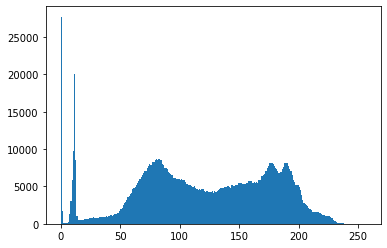

In [6]:
plt.hist(image.ravel(),256,[0,256])
plt.show()

shape:  (1024, 1024)


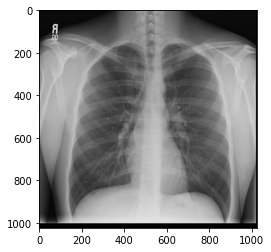

In [7]:
path = '30/training_data/00006724_000.png'
image = cv2.imread(path,0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print("shape: ",image.shape)

In [15]:
# generate training scans
import os
train_scans = [os.path.join("30/training_data", folder)
               for folder in os.listdir("30/training_data")]

In [16]:
train_scans

['30/training_data/00006725_002.png',
 '30/training_data/00006724_003.png',
 '30/training_data/00006724_000.png',
 '30/training_data/00006725_000.png',
 '30/training_data/00006725_001.png',
 '30/training_data/00006725_004.png',
 '30/training_data/00006723_000.png',
 '30/training_data/00006725_003.png',
 '30/training_data/00006724_002.png',
 '30/training_data/00006724_001.png']

In [24]:
def train(img_fns, mask_fns=None, i_min=1, i_max=99, i_s_min=1, i_s_max=100, l_percentile=10, u_percentile=90, step=10):
    """
    determine the standard scale for the set of images
    Args:
        img_fns (list): set of NifTI MR image paths which are to be normalized
        mask_fns (list): set of corresponding masks (if not provided, estimated)
        i_min (float): minimum percentile to consider in the images
        i_max (float): maximum percentile to consider in the images
        i_s_min (float): minimum percentile on the standard scale
        i_s_max (float): maximum percentile on the standard scale
        l_percentile (int): middle percentile lower bound (e.g., for deciles 10)
        u_percentile (int): middle percentile upper bound (e.g., for deciles 90)
        step (int): step for middle percentiles (e.g., for deciles 10)
    Returns:
        standard_scale (np.ndarray): average landmark intensity for images
        percs (np.ndarray): array of all percentiles used
    """
    mask_fns = [None] * len(img_fns) if mask_fns is None else mask_fns
    percs = np.concatenate(([i_min], np.arange(l_percentile, u_percentile+1, step), [i_max]))
    standard_scale = np.zeros(len(percs))
    for i, (img_fn, mask_fn) in enumerate(zip(img_fns, mask_fns)):
        img_data = io.imread(img_fn)
        mask = io.imread(mask_fn) if mask_fn is not None else None
        mask_data = img_data > img_data.mean() if mask is None else mask.get_data()
        masked = img_data[mask_data > 0]
        landmarks = get_landmarks(masked, percs)
        min_p = np.percentile(masked, i_min)
        max_p = np.percentile(masked, i_max)
        f = interp1d([min_p, max_p], [i_s_min, i_s_max])
        landmarks = np.array(f(landmarks))
        standard_scale += landmarks
    standard_scale = standard_scale / len(img_fns)
    return standard_scale, percs

In [25]:
from skimage import io
standard_scale, perc = train(train_scans)

In [26]:
standard_scale

array([  1.        ,  13.29325925,  24.28322248,  33.34299836,
        41.67194913,  50.26497922,  58.46501634,  67.59136958,
        76.79453861,  86.26038926, 100.        ])

In [27]:
perc

array([ 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99])

In [30]:
standard_scale, perc = nyul_train_standard_scale(train_scans)

processing scan  30/training_data/00006725_002.png
processing scan  30/training_data/00006724_003.png
processing scan  30/training_data/00006724_000.png
processing scan  30/training_data/00006725_000.png
processing scan  30/training_data/00006725_001.png
processing scan  30/training_data/00006725_004.png
processing scan  30/training_data/00006723_000.png
processing scan  30/training_data/00006725_003.png
processing scan  30/training_data/00006724_002.png
processing scan  30/training_data/00006724_001.png


In [31]:
standard_scale

array([  1.        ,  13.29325925,  24.28322248,  33.34299836,
        41.67194913,  50.26497922,  58.46501634,  67.59136958,
        76.79453861,  86.26038926, 100.        ])

In [32]:
perc

array([ 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99])

In [34]:
standard_path = 'standard_hist.npy'
np.save(standard_path, [standard_scale, perc])

In [36]:
image_1_norm = nyul_apply_standard_scale(io.imread(train_scans[0]), standard_path)

In [37]:
image_1_norm

array([[-33.2455079 , -44.6606772 , -52.56348671, ..., -92.07753429,
        -92.07753429, -92.07753429],
       [-33.2455079 , -43.78258725, -52.56348671, ..., -92.07753429,
        -92.07753429, -92.07753429],
       [-33.2455079 , -44.6606772 , -53.44157666, ..., -92.07753429,
        -92.07753429, -92.07753429],
       ...,
       [-50.80730682, -56.95393644, -59.58820628, ..., -80.66236499,
        -81.54045493, -92.07753429],
       [-47.29494704, -51.68539677, -56.0758465 , ..., -78.9061851 ,
        -79.78427504, -91.19944434],
       [-42.90449731, -49.05112693, -52.56348671, ..., -76.27191526,
        -78.02809515, -89.44326445]])

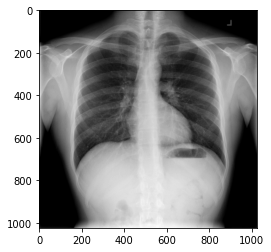

In [39]:
plt.imshow(image_1_norm,'gray')

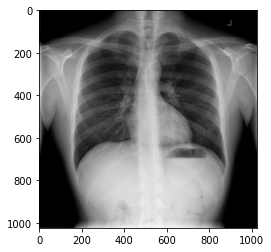

In [41]:
path = '30/training_data/00006725_002.png'
image = cv2.imread(path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

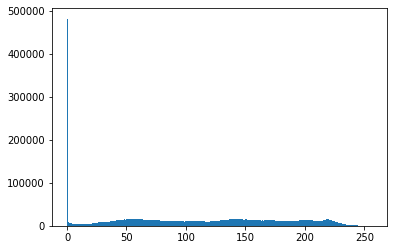

In [42]:
plt.hist(image.ravel(),256,[0,256])
plt.show()

In [44]:
image_1_norm.max()

112.88088506679311

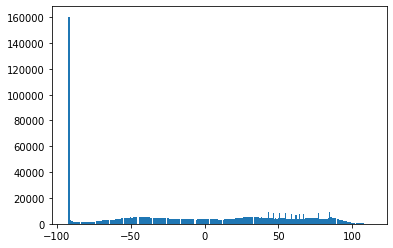

In [45]:
plt.hist(image_1_norm.ravel(),256,[-93,113])
plt.show()

In [114]:
image_1_norm = nyul_apply_standard_scale(io.imread("30/testing_data/00006727_003.png"), standard_path)

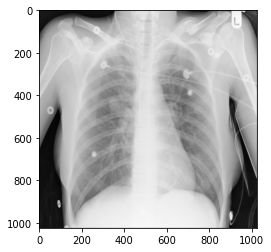

In [115]:
plt.imshow(image_1_norm,'gray')

In [116]:
image_1_norm.max()

112.97629903025084

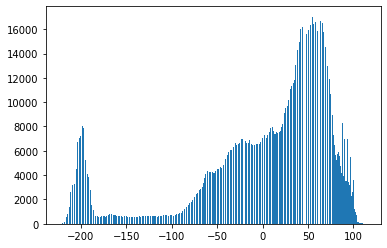

In [117]:
plt.hist(image_1_norm.ravel(),335,[-222,113])
plt.show()

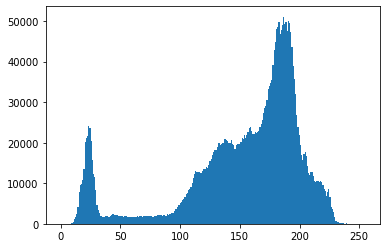

In [129]:
path = '30/testing_data/00006727_003.png'
image = cv2.imread(path)
plt.hist(image.ravel(),256,[0,255])
plt.show()

In [130]:
def imadjust(x,a,b,c,d,gamma=1):
        y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
        return y
imadjust_image = imadjust(image_1_norm, image_1_norm.min(), image_1_norm.max(), 0, 255)
imadjust_image = imadjust_image.astype(np.uint8)

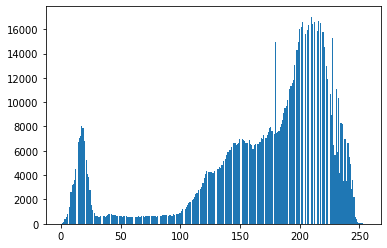

In [131]:
plt.hist(imadjust_image.ravel(),256,[0,255])
plt.show()

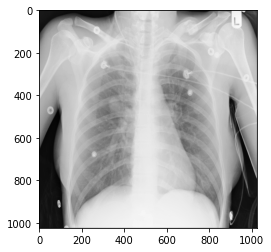

In [132]:
plt.imshow(imadjust_image, 'gray')

In [133]:
neg = 255 - imadjust_image

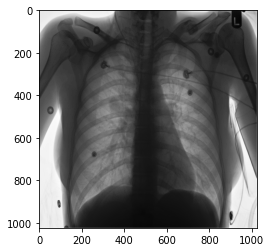

In [134]:
plt.imshow(neg, 'gray')

In [124]:
neg.max()

255